<a href="https://colab.research.google.com/github/gilarndw/Data_Science_proj/blob/main/tesla_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/datasets/TSLA.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2813 non-null   object 
 1   Open       2813 non-null   float64
 2   High       2813 non-null   float64
 3   Low        2813 non-null   float64
 4   Close      2813 non-null   float64
 5   Adj Close  2813 non-null   float64
 6   Volume     2813 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 154.0+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2.813000e+03
mean,98.307804,100.386953,96.069256,98.349877,98.349877,3.160441e+07
std,176.108180,179.847860,171.937613,176.160413,176.160413,2.857384e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,8.838000,9.228000,8.782000,9.090000,9.090000,1.232800e+07
50%,45.720001,46.307999,44.908001,45.664001,45.664001,2.513300e+07
75%,63.998001,65.334000,63.014000,64.269997,64.269997,4.050650e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2808,2021-08-24,710.679993,715.219971,702.640015,708.489990,708.489990,13083100
2809,2021-08-25,707.030029,716.969971,704.000000,711.200012,711.200012,12645600
2810,2021-08-26,708.309998,715.400024,697.619995,701.159973,701.159973,13214300
2811,2021-08-27,705.000000,715.000000,702.099976,711.919983,711.919983,13762100


In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_date

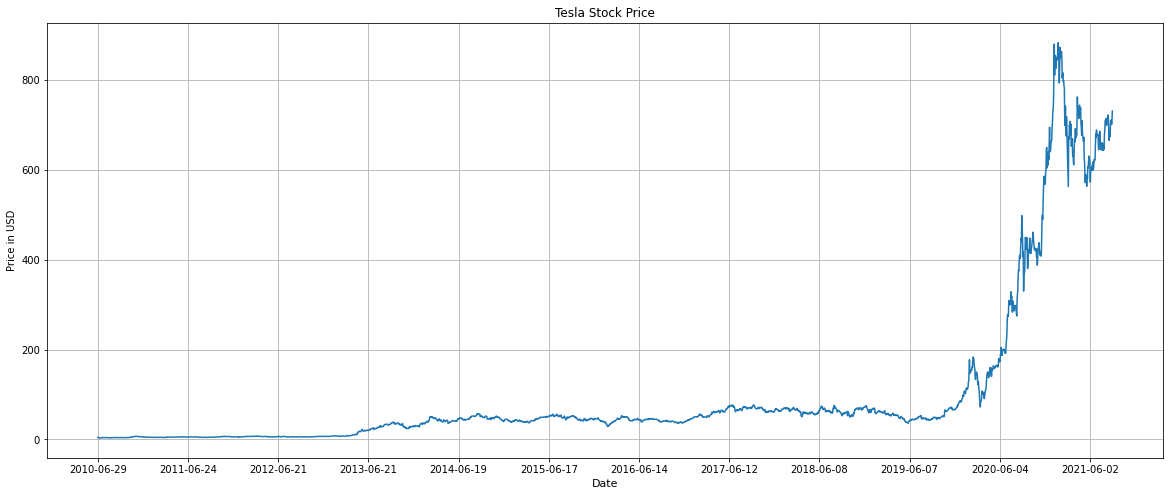

In [15]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(df['Date'], df['Close'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize = '11')
ax.set_ylabel('Price in USD')
plt.title('Tesla Stock Price')
plt.grid()
plt.show()

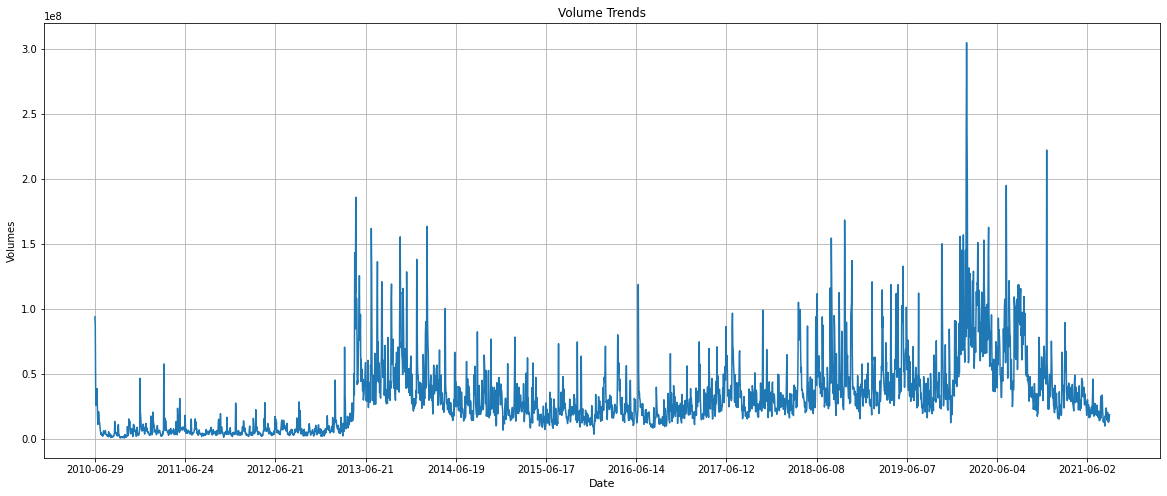

In [16]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(df['Date'], df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize = '11')
ax.set_ylabel('Volumes')
plt.title('Volume Trends')
plt.grid()
plt.show()

In [17]:
df['Market Cap'] = df['Volume'] * df['Open']

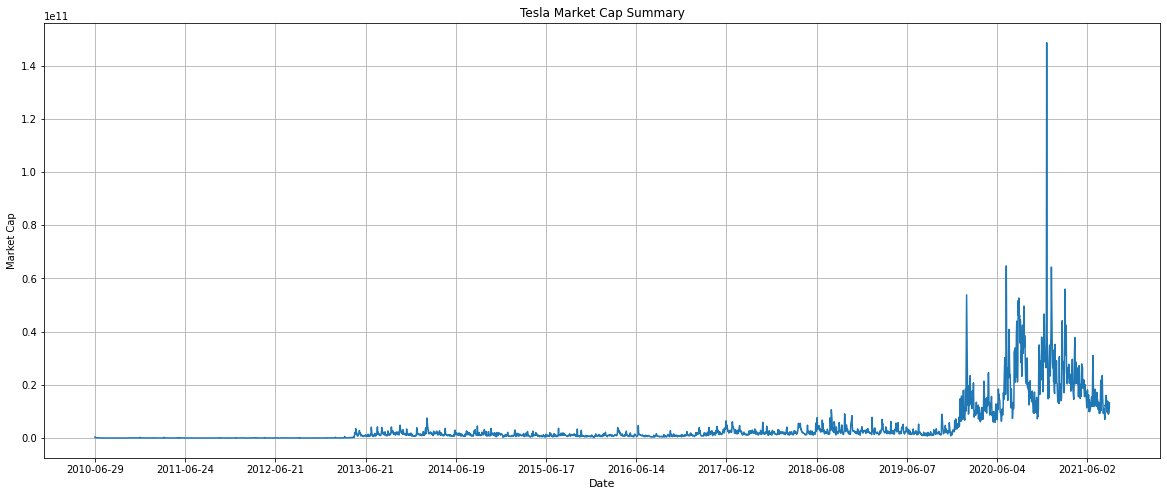

In [18]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(df['Date'], df['Market Cap'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize = '11')
ax.set_ylabel('Market Cap')
plt.title('Tesla Market Cap Summary')
plt.grid()
plt.show()

In [19]:
from scipy import stats

In [21]:
slope, intercept, r, p, std_err = stats.linregress(df['Close'], df['Market Cap'])

print(r)

0.779753744344746


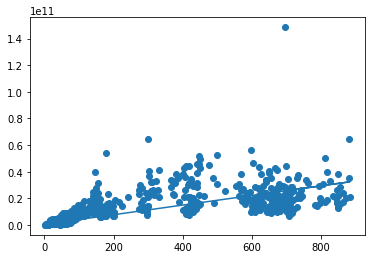

In [26]:
slope, intercept, r, p, std_err = stats.linregress(df['Close'], df['Market Cap'])

def linfunct(x) :
  return slope * x + intercept

linmodel = list(map(linfunct, df['Close']))

plt.scatter(df['Close'], df['Market Cap'])
plt.plot(df['Close'], linmodel)
plt.show()